In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.columns = ['id', 'entity', 'sentiment', 'content']

df.head()

Saving twitter_training.csv to twitter_training (2).csv


,id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# df.drop(columns=['id'], inplace=True)

df.dropna(inplace=True)

print(df['sentiment'].value_counts())

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


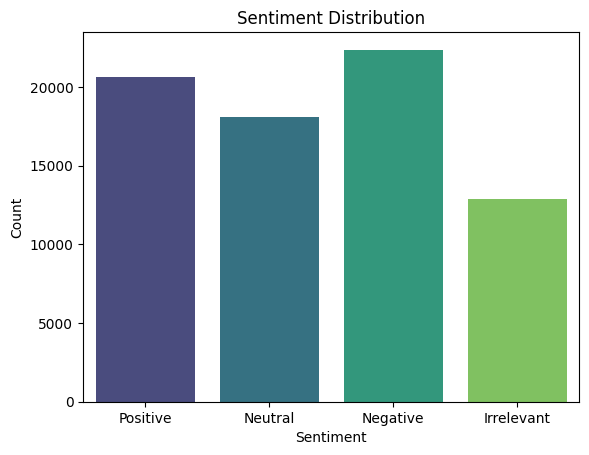

In [13]:
sns.countplot(x='sentiment', hue='sentiment', data=df, palette='viridis', legend=False) # use palette accroding to you like magma,crest,flare,rocket,seagreen,etc.
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

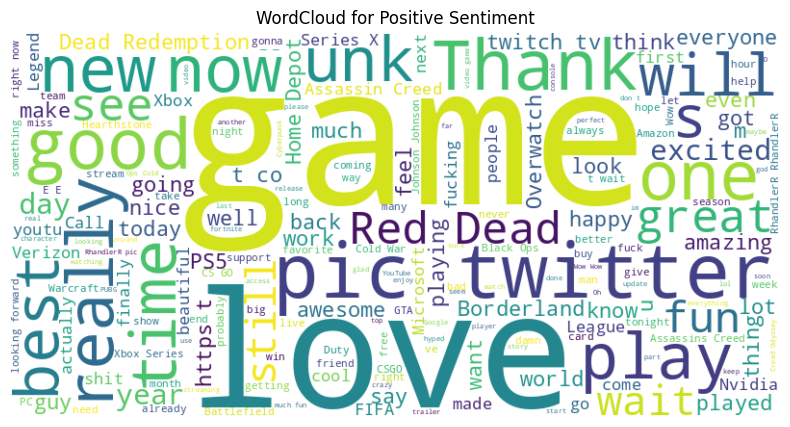

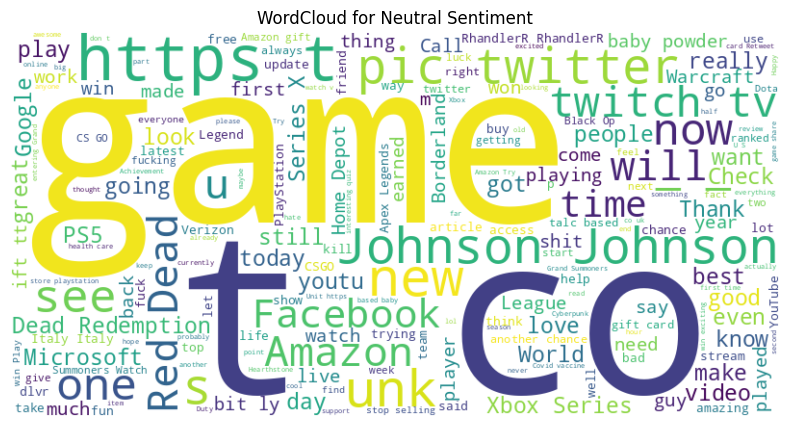

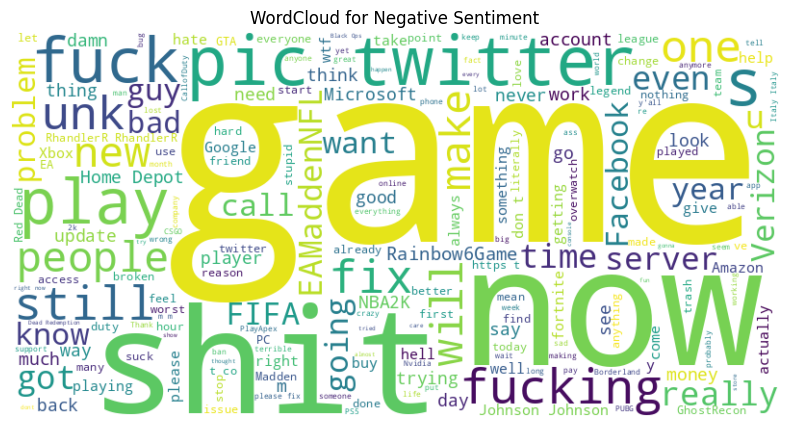

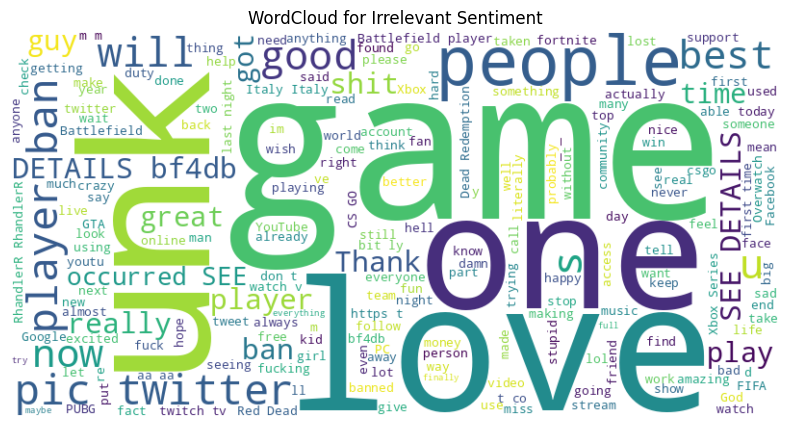

In [9]:
def plot_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['content'])
    wc = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

for s in df['sentiment'].unique():
    plot_wordcloud(s)

In [10]:
top_entities = df.groupby(['sentiment', 'entity']).size().reset_index(name='count')
top_entities = top_entities.sort_values(['sentiment', 'count'], ascending=[True, False])

for sentiment in df['sentiment'].unique():
    data = top_entities[top_entities['sentiment'] == sentiment].head(10)
    fig = px.bar(data, x='entity', y='count', title=f"Top Entities in '{sentiment}' Sentiment", color='entity')
    fig.show()